# 12. MODFLOW6 Introduction

:::{admonition} Course Website
[Link to Course Website](http://54.243.252.9/ce-5364-webroot/) 
:::

In this section, we explore the simulation of contaminant transport in groundwater systems using MODFLOW 6 and its Python interface. MODFLOW 6, the industry-standard tool for groundwater modeling, allows for the integration of complex transport processes with hydraulic flow simulations. Through practical examples, we will demonstrate how to model contaminant migration, interface with Python for enhanced data manipulation, and analyze the impact of environmental variables on transport dynamics.

---
## Readings

1. [Bear and Cheng](http://54.243.252.9/ce-5364-webroot/3-Readings/BearCheng2010/978-1-4020-6682-5.pdf)

2. [Bedient etal.](http://54.243.252.9/ce-5364-webroot/3-Readings/Bedient_et_al/Bedient_et_al._Complete%20reduced.pdf)

3. [Bear, J. (1972) *Dynamics of Fluids in Porous Media* McGraw Hill (pp. 628-629)](https://www.amazon.com/Dynamics-Fluids-Porous-Mechanical-Engineering/dp/0486656756)

4. [Groundwater Modeling Exercise (used in ModelMUSE video)](http://54.243.252.9/ce-4363-webroot/3-Readings/Groundwater_modelling_exercise.pdf)

2. [MODFLOW Notes (Cleveland circa 1992)](http://54.243.252.9/ce-4363-webroot/3-Readings/modflowNotes01.pdf)  The Obleo Aquifer simulation in the MODFLOW88 video is described in these notes.

3. [MODFLOW Manual (US EPA)](http://54.243.252.9/ce-4363-webroot/3-Readings/modflmn.pdf) An EPA training document on the use of MODFLOW

4. [Zheng, C. and Wang, P.P. (1999) *MT3DMS: A Modular Three-Dimensional Multispecies Transport Model for Simulation of Advection, Dispersion, and Chemical Reactions of Contaminants in Groundwater Systems; Documentation and User's Guide* Strategic Environmental Research and Development Program, Final Report SERDP-99-1](http://54.243.252.9/ce-5364-webroot/3-Readings/MT3DMS/MT3DMS-1999-Report.pdf)

5. [Zheng, C. and Bennett, G.D. (1995) *Applied Contaminant Transport Modeling* Van Nostrand Reinhold](http://54.243.252.9/ce-5364-webroot/ce5364notes/chapters/3advection/Advection.PDF)

6. [FloPy: Python Package for Creating, Running, and Post-Processing MODFLOW-Based Models ](https://www.usgs.gov/software/flopy-python-package-creating-running-and-post-processing-modflow-based-models)

7. [MT3DMS Problem 9 (On-line documentation for MT3D)](https://modflow6-examples.readthedocs.io/en/master/_notebooks/ex-gwt-mt3dms-p09.html)

8. [MODFLOW6 Transport Model Documentation](https://pubs.usgs.gov/tm/06/a61/tm6a61.pdf)

## Videos

1. [Installing ModelMuse and MODFLOW 6 on a local computer](https://www.youtube.com/watch?v=x_D_rvsQ-tI&feature=youtu.be)


## Scope
- Overview of numerical groundwater modeling
- Installation and configuration of MODFLOW6 and FLOPY

## Outline
- Introduction 
- Installation and Configuration of MODFLOW 6

## Overview of MODFLOW 6 and Python's role in contaminant transport modeling.

MODFLOW 6 is a powerful and flexible software for simulating groundwater flow, supporting modular approaches to incorporate various physical processes, including contaminant transport. When combined with Python, particularly using libraries like flopy, the process of setting up, running, and analyzing MODFLOW models becomes more efficient and customizable. Python’s role extends beyond automation, enabling seamless integration of transport modeling, advanced data handling, and real-time visualization of contaminant movement within groundwater systems.

## Importance of Leveraging Python for Automation and Customization in Groundwater Modeling

Python has become an essential tool in groundwater modeling due to its flexibility, ease of use, and ability to streamline complex workflows. When working with models like MODFLOW 6, creating and managing input files manually can be a tedious and error-prone process, particularly for large or multi-scenario simulations. Python allows us to automate these repetitive tasks efficiently. For instance, using libraries like `flopy`, we can automate the generation, manipulation, and validation of input files, significantly reducing the time required to set up models.

Beyond automation, Python also enables a high degree of customization. Groundwater models often require unique configurations tailored to specific environmental conditions or project objectives. With Python, we can write custom scripts to modify model parameters, handle boundary conditions dynamically, or integrate external datasets, such as real-time hydrological data or geospatial information. This customization not only saves time but also enhances the accuracy and flexibility of the model, making it easier to adapt to changing project needs.

Moreover, Python’s vast ecosystem of libraries (like `numpy`, `pandas`, and `matplotlib`) supports advanced data analysis and visualization, allowing engineers and scientists to interpret simulation results more effectively. Instead of manually reviewing raw output files, Python can be used to automate the extraction of key metrics, generate plots, and even create animated visualizations of flow and contaminant transport. This capacity for automation and customization makes Python an invaluable tool for modern groundwater modeling, enabling professionals to focus more on the science and decision-making, rather than the intricacies of file management and data processing.

## Comparison to Modflow 2005
:::{note}
The contents are adapted from reading USGS documentation, with some edits offered by a GPT assistant
:::

1. Conceptual Evolution

**MODFLOW-2005**

The final generation of the “classic” MODFLOW line (after MODFLOW-88, MODFLOW-96, MODFLOW-2000).

Structured around a single groundwater flow model (GWF) with optional packages (e.g., BAS, LPF, RCH, WEL).

Each model run represents one system, and coupling to other processes (transport, unsaturated flow, etc.) requires external programs (e.g., MT3DMS, SEAWAT, UZF).

**MODFLOW-6**

A complete redesign—modularized, object-oriented, and aimed at multi-model integration.

Built as a framework that can host multiple model types (flow, transport, exchanges) under a single simulation.

Implements a solver-based coupling scheme that lets you run multiple groundwater flow models, or flow + transport models, simultaneously.

2. Architecture and File Structure
   
|Aspect	|MODFLOW-2005|	MODFLOW-6|
|-------|------------|-----------|
|Execution Structure	|One model = one name file listing package files	|A simulation includes one or more models (GWF, GWT, etc.) and exchanges|
|Control Files	|*.nam (name file) lists packages	|*.mfsim.nam (simulation name file) lists sub-components (TDIS, models, exchanges, solver)|
|Temporal Control	|DIS, BAS, and OC manage timing|	Unified TDIS (time discretization) and IMS (solver) modules used across models|
|Coupling	|External or one-way only	|Internal, iterative coupling (e.g., flow–transport feedback, multi-model exchanges)|
|Packages	|File-centric, limited cross-communication	|Object-oriented, with package interconnections through memory structures|

3. Model Types and Flexibility

**MODFLOW-2005**

- Only GWF (Groundwater Flow).
- Transport handled by external programs (e.g., MT3DMS, SEAWAT).
- Limited support for unstructured grids (only via derivatives like MODFLOW-USG).

**MODFLOW-6**

- Multiple model types built-in:
- GWF = Groundwater Flow
- GWT = Groundwater Transport
- GWE = Groundwater Energy
- GWF6 ↔ GWF6 exchanges (e.g., river–aquifer, regional–local coupling)
- Native unstructured grid and DISV (Voronoi-based) support.
- Fully supports nested, coupled models.

4. Numerical Improvements

|Feature	|MODFLOW-2005	|MODFLOW-6|
|-----------|---------------|---------|
|Solver|	PCG, SIP, DE4, GMG (per model)	|Unified IMS (Iterative Model Solution), allows shared solvers between models|
|Stress Packages	|Each independent	|Can be reused, linked, or turned on/off dynamically|
|Mass Balance	|Basic water budget	|Unified water/mass/energy budget across all models|

5. FLOPY Integration Differences
   
|Task	|MODFLOW-2005	|MODFLOW-6|
|-------|---------------|---------|
|Import Package Creation	|flopy.modflow.Modflow()<br>e.g. flopy.modflow.ModflowDis(...)|	flopy.mf6.MFSimulation() <br> e.g. flopy.mf6.ModflowGwfdis(...)|
|Run	|mf.run_model()	|sim.run_simulation()|
|Output Handling	|Binary .cbc, .hds	|Similar files but accessed via new MF6 readers; consistent units|

In teaching: MF6’s syntax seems “heavier” at first but is more logical once modularization clicks—you’re assembling a simulation, not just one flow model.

6. Backward Compatibility and Transition

- MF6 cannot directly read MODFLOW-2005 input files, but FloPy can often translate them.

- The conceptual model (heads, stresses, BCs) remains familiar, but naming and scope differ:

- CHD (constant head) → same.

- WEL (well package) → same logic, new syntax.

- OC (output control) → now part of model setup, not a separate package.

- Many external tools (ModelMuse, Groundwater Vistas) have added MF6 support, but with limitations.

7. Why Move to MODFLOW-6?

- Enables tightly coupled flow–transport systems (GWF–GWT) without external programs.

- Easier multi-model linkage (regional/local, saturated/unsaturated).

Cleaner numerical control through shared solvers.

- Modernized I/O structure (YAML-like control, cross-platform binaries).

- Fully supported by USGS moving forward; MODFLOW-2005 is now in maintenance only mode.

8. When to Stay with MODFLOW-2005

- Legacy project compatibility.

- Use of third-party software not yet ported to MF6.

- Teaching fundamentals where the classic architecture is pedagogically simpler.

**Summary**

|Feature	|MODFLOW-2005	|MODFLOW-6|
|-----------|---------------|---------|
|Core concept	|Single GWF model	|Framework for multiple models|
|Coupling	|External / one-way	|Internal / two-way|
|Grid support|	Structured	|Structured + Unstructured|
|Solver architecture	|Per-model	|Shared IMS solver|
|FLOPY class	|flopy.modflow	|flopy.mf6|
|USGS support status	|Maintenance	|Active development|


# Installation & Configuration of MODFLOW 6

## MODFLOW 6 and ModelMUSE (a GUI)

This is a common way to use MODFLOW, with a GUI.

:::{warning}
I don't use ModelMUSE in this document, it is not well suited to server-side Jupyter Notebooks.  The GUI in my opinion is not much easier for model building than just writing python scripts; the outputs are similarily not much better than building your own plotting scripts.  Your mileage may vary - the underlying computation engine is the same regardless of the choice to use ModelMUSE or GWVistas, or FloPy
:::

  The install is not that hard, but also not point and click.  A video showing an installation is available for viewing at:

- [Installing ModelMuse and MODFLOW 6 on a local computer](https://www.youtube.com/watch?v=x_D_rvsQ-tI&feature=youtu.be)

The installation process is:

1. GOOGLE "modflow 6"  and/or select: [https://www.usgs.gov/software/modflow-6-usgs-modular-hydrologic-model](https://www.usgs.gov/software/modflow-6-usgs-modular-hydrologic-model) Download the MODFLOW 6 program (choose windows installer)

2. GOOGLE "ModelMuse" and/or select: [https://www.usgs.gov/software/modelmuse-a-graphical-user-interface-groundwater-models](https://www.usgs.gov/software/modelmuse-a-graphical-user-interface-groundwater-models)  Download the interface program (installer for 32/64 bit.  When you get a real job, have an IT professional do the install and testing - they can set environment variables in the OS correctly.

3. Create C:/WRDAPP folder to house modflow binaries - note the folder attaches at C:/  any other path will probably mess things up later on.

4. Install ModelMuse using installer (double click, accept defaults)

5. Move the modflow package into C:/WRDAPP folder, extract package, put into folder root.

6. Start ModelMuse
  - create MODFLOW
  - next
  - next
  - Model/MODFLOW Program Locations
  - set the directory path (may need to edit names a bit)
  
7. Restart ModelMuse and run tutorial.
  - Pray for smiley faces!
  - Yay! Install complete. 
  
:::{warning}
My notes use MODFLOW6 and FloPy to create, run, and interpret simulations.  ModelMUSE is difficult to get working using the supplied open source content; a considerable investment in time and trial-and-error is needed to self-teach at all. GW Vistas is another option. GW Vistas is a for-profit tool; the student options turn to dust (in a legal sense) when you graduate.  If you use Groundwater Vistas, use their tutorials - the key point is MODFLOW 6 is supposed to have a transport model already internalized.  
:::

## MODFLOW 6 and FloPy

This is another common way to use MODFLOW, and access the binaries from python scripts or Jupyter Notebooks (with an ipython kernel).

### Overview of Installation Requirements
To install and run MODFLOW 6 with FloPy, consider the following system requirements and dependencies.

- **System Requirements for MODFLOW 6 and Python**
  - **MODFLOW 6 Official Documentation:** [USGS MODFLOW 6](https://www.usgs.gov/software/modflow-6)
  - **Python Compatibility:** FloPy is compatible with Python 3.7+ and requires `numpy`, `scipy`, and `matplotlib`.

- **Key Dependencies for Different Operating Systems**
  - **Windows**: Microsoft Visual C++ Build Tools (if compiling from source)
  - **macOS**: `gfortran` compiler if building MODFLOW from source
  - **Linux**: `gfortran`, `make`, and `gcc/g++`

### Installation on Various Architectures

#### Windows (x86-64) and macOS (Intel) Installation
- **Installing Pre-Compiled Binaries**
  - Download the latest MODFLOW 6 binaries from [USGS MODFLOW Releases](https://github.com/MODFLOW-USGS/modflow6/releases).
  - Unzip the package and place the binaries in a known directory.
  - Add the binary path to the system environment variables.
- **Step-by-Step Guides**
  - USGS MODFLOW 6 User Guide: [Installation Steps](https://water.usgs.gov/ogw/modflow/MODFLOW.html)
  - YouTube Tutorials:
    - [Installing MODFLOW and FloPy on Windows](https://www.youtube.com/results?search_query=install+MODFLOW+6+FloPy+Windows)
    - [Using MODFLOW 6 in Python](https://www.youtube.com/results?search_query=modflow+6+python)

### Step-by-Step Example Install on Windows 11 
:::{warning}
I added this section on 10/23/2025.  I will demonstrate "correct" install on a PC in class.  The prior demonstration was all confused because I was overcomplicating things.
:::

**Workflow**

1. Install Python
2. Download MODFLOW6 from Repository
3. Install `flopy`
4. Install `jupyterlab`
5. Install `jupyter notebook`
6. Extract MODFLOW to known location (some folks like to modify path variable, I use different approach)
7. Build Example

#### Install Python

- Download the current version of Python from the official [website](https://www.python.org/downloads/).
- During the Python installation process:
  1. check the `Add Python` to path option, leaving the other parameters at their default settings
  2. Then click on `Install Now`.
- Verify the install by opening a terminal window and run `C:/hostname/your_userid/>python --version`  It should return something like `3.13.11`  If `3.7.#` or higher returns then all is well.

#### Download MODFLOW6

- Download a .zip archive of compiled MODFLOW6 from [USGS GitHub repository](https://github.com/MODFLOW-ORG/modflow6/releases).

#### Install `flopy`
- Run `C:/hostname/your_userid/your_workspace>pip install flopy`

#### Install `jupyterlab`
- Run `C:/hostname/your_userid/your_workspace>pip install jupyterlab`

#### Install `jupyter notebook`
- Run `C:/hostname/your_userid/your_workspace>pip install jupyter notebook`

#### Verify `jupyter` installs
- Run `C:/hostname/your_userid/your_workspace>jupyter notebook`
- Should generate modern geek (and/or nerdian dialect of gibberish), and launch a browser window pointing to `http://localhost:8888` or something similar.  
- In the menu `View/Open Jupyter Lab`

#### Extract MODFLOW6
- The .zip file can be extracted to a convienent location, and you can skip to the example below

---

#### ARM7 and AARCH Architecture (e.g., Raspberry Pi, Apple Silicon)
- **Compiling MODFLOW 6 from Source**
  - **Clone the MODFLOW 6 repository:**
    ```bash
    git clone https://github.com/MODFLOW-USGS/modflow6.git
    ```
  - **Install the GNU Fortran compiler:**
    ```bash
    sudo apt-get install gfortran
    ```
  - **Compile MODFLOW 6:**
    ```bash
    cd modflow6
    make
    ```
  - Move the compiled binaries to a memorable location (e.g., `/usr/local/bin`).
  - Specify the binary path in FloPy:
    ```python
    import flopy
    flopy.mf6.ModflowGwf(sim, exe_name='/path/to/mf6')
    ```

#### Ubuntu 20+ Linux Installation
For server environments, MODFLOW 6 can be installed using package managers or compiled from source.

- **Installation via `apt-get` (Debian-based systems)**
  ```bash
  sudo apt update
  sudo apt install gfortran make gcc g++
  ```
- **Installation via `Conda`**

   ```bash
   conda install -c conda-forge modflow6
   ```
   
- **Compiling from Source** Follow the [USGS MODFLOW 6 Compilation Guide](https://github.com/MODFLOW-USGS/modflow6/blob/main/docs/Building.md).

**Troubleshooting Common Issues:**

- **Permission Errors:**
   - Ensure executable permissions with:
```bash
chmod +x /path/to/mf6
```
- **Library Issues:**
   - Verify Fortran libraries using:
```bash
ldd /path/to/mf6
```

**Configuration and Environment Setup:**

To streamline the use of MODFLOW 6 and FloPy, proper configuration is essential.

1. **Setting Up the Python Environment**
  - Create a virtual environment:
```bash
python -m venv modflow-env
source modflow-env/bin/activate  # Linux/macOS
modflow-env\Scripts\activate  # Windows
```
  - Install required packages:
```bash
pip install flopy numpy matplotlib scipy
```

2. **Verifying the Installation**

  - Run the following Python script:
```python
import flopy
print(flopy.__version__)
```
  - Execute MODFLOW 6 from the command line:
```bash
mf6 --version
```

**Server-Side Considerations**

When running MODFLOW on a multi-user server:
- Use a dedicated virtual environment per user.
- Store MODFLOW 6 binaries in a shared /usr/local/bin directory.
- Implement job scheduling with nohup or tmux to run long simulations.

By following these steps, you can successfully install, configure, and use MODFLOW 6 and FloPy across multiple systems.

<!--## Installation and Configuration of MODFLOW 6-->
A way to access MODFLOW using Python and Jupyter Notebooks is avaliable at 

[FloPy: Python Package for Creating, Running, and Post-Processing MODFLOW-Based Models ](https://www.usgs.gov/software/flopy-python-package-creating-running-and-post-processing-modflow-based-models)

The PDF link below shows the installation and an example run on a Raspberry Pi (configured as a JupyterHub server).

[MODFLOW on a Jupyter Server - notes](http://54.243.252.9/ce-4363-webroot/ce4363notes/lessons/groundwatermodels/installing.pdf)

On the Raspberry Pi server which is `aarch64` ARM chipset, I had to compile the modflow binary into a directory, and have chosen to supply explicit paths to the binaries.  Its a clunky approach, but manageable if intent is to port to `amd/intel x86-64` chipset.

What follows are:
- Groundwater flow (only) models:
  1. Steady flow, Single layer aquifer
  2. Transient flow, Single layer aquifer
  3. Transient flow, Multiple layer aquifer
- Groundwater flow and transport model.
  1. Transient flow, Single layer aquifer, Conservative Tracer (Example 9 MT3DMS)

## Updated to run on AWS server directly

:::{note}
The `aarch64` build (above) was moved onto an AWS server which houses the course notes.  This is an Intel/AMD (x86-64) architecture, so two one-time commands are issued as shown below.  The examples that follow have revised explicit paths to show the minor changes required to move from architecture to architecture

The two cells below are one-time commands to install and get the binaries

To add flopy to the python kernel:

```python
# su to a member of wheel or sudoers, then execute:
sudo -H /opt/jupyterhub/bin/python3 -m pip install flopy
# exit shell - flopy is added to the kernel
```

To get current binaries (for intel architecture):

```python
# open a Jupyter notebook; then execute (path must exist):
! get-modflow /home/sensei/mfplayground/modflow-python/mf6.4.1_linux/bin
# exit the notebook - this command would be issued infrequently, whenever user is aware of a binary upgrade.
```
:::

# MODFLOW6 Aquifer Flow using FloPy
- Setting up a steady-state groundwater flow model
- Visualization of results in Python

## Example 1. Single Layer Steady Flow

:::{note} This section was orginally a worked example using `FLOPY` and `MODFLOW6` installed on a `aarch-64` computer.  `x86-...` architectures should use the `! get-modflow` method to download (in near real time) current binaries.  Modifications to the notes were made to get it to run natively on AWS:::

### Obleo Aquifer Example

This is a steady-state model of the Obleo aquifer system depicted below:

![](obleoaquifer.png)

Sone added information about the system is:

![](obleoparticulars.png)

The general goals for the analysis are:

![](obleogoals.png)

So with a little infomration regarding how we will manage elevations we can move forward with the modeling effort.

![](obleovertdatum.png)

Now onto **modflow**

:::{warning}
Nearly every cell throws a deprecation warning, that filterwarnings('ignore') fails to suppress.  Code seems to still run on my server, but over time as new updates are added to the kernel the code at some point will fail without addressing the warning.  The development computer is `aarch64` an arm processor.  The AWS server is `amd64/intel` architecture, which gets a lot of code development so should stay current longer.  This continuous integration CI and push changes model of modern IT support is phenomenally annoying, but for time being have to get used to it.
:::

In [71]:
%reset -f

In [72]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [73]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import matplotlib.pyplot as plt
import flopy

In [74]:
# Workspace and Executibles
#binary = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mf6"  # location on MY computer of the compiled modflow program
#workarea = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/example_2" # location on MY computer to store files this example (directory must already exist)

binary = "/home/sensei/mfplayground/modflow-python/mf6.4.1_linux/bin/mf6"  # location on AWS computer of the compiled modflow program
workarea = "/home/sensei/ce-5364-webroot/mfexperiments/example_1" # location on MY computer to store files this example (directory must already exist)


# Set Simulation Name
name = "example01_obleo"

##### FLOPY Build simulation framework ####
sim = flopy.mf6.MFSimulation(
    sim_name=name, exe_name=binary, version="mf6", sim_ws=workarea
)

In [75]:
# Set Time Structure
Time_Units="YEARS"

##### FLOPY Build time framework ##########
tdis = flopy.mf6.ModflowTdis(
    sim, pname="tdis", time_units=Time_Units, nper=1, perioddata=[(1.0, 1, 1.0)]
)

In [76]:
# Set Iterative Model Solution (choose solver parameters)
# about IMS see: https://water.usgs.gov/nrp/gwsoftware/ModelMuse/Help/sms_sparse_matrix_solution_pac.htm
# using defaults see: https://flopy.readthedocs.io/en/3.3.2/source/flopy.mf6.modflow.mfims.html

##### FLOPY Build IMS framework ###########
ims = flopy.mf6.ModflowIms(sim, pname="ims", complexity="SIMPLE")

In [77]:
# Set Model Name (using same base name as the simulation)
model_nam_file = "{}.nam".format(name)

##### FLOPY Build Model Name framework ####
gwf = flopy.mf6.ModflowGwf(sim, modelname=name, model_nam_file=model_nam_file)

In [78]:

# Define The Grid
Nlay = 1 #number layers
Nrow = 11 #number rows
Ncol = 11 #number columns
# Define distances and elevations
delrow = 1000 # cell size along columns (how tall is a row)
delcol = 1000 # cell size along row (how wide is a column)
topelev = 100.0 # elevation of top of aquifer
thick = 1000.0 #aquifer thickness

bot = [topelev-thick] # bot is a list with Nlay entries
#print(bot)


##### FLOPY Build Model Grid framework #####
dis = flopy.mf6.ModflowGwfdis(gwf,nlay=Nlay,nrow=Nrow,ncol=Ncol,delr=delrow,delc=delcol,top=topelev,botm=bot,
)


In [79]:
# Define initial conditions
h1 = 0.0 # 
start = h1 * np.ones((Nlay, Nrow, Ncol)) # start heads are h1 everywhere

##### FLOPY Build Initial Conditions framework ###
ic = flopy.mf6.ModflowGwfic(gwf, pname="ic", strt=start)

In [80]:
# Define hydraulic conductivity arrays
K = 3650.0
k = K * np.ones((Nlay, Nrow, Ncol)) # Hydraulic conductivity is K everywhere
# Use above to build layer-by-layer spatial varying K
# need to read: to deal with Kx!=Ky


##### FLOPY Build BCF framework ######
npf = flopy.mf6.ModflowGwfnpf(gwf, icelltype=1, k=k, save_flows=True) 
# setting icelltype > 0 is unconfined 
# https://flopy.readthedocs.io/en/3.3.5/source/flopy.mf6.modflow.mfgwfnpf.html?highlight=icelltype#flopy.mf6.modflow.mfgwfnpf.ModflowGwfnpf.icelltype

In [81]:
# Define constant head boundary conditions
chd_rec = []
#h2 = 90 # Just a different value 
#chd_rec.append(((0, 5, 5), h2))
# L,R,T,B constant head boundaries
for layer in range(0, Nlay):
    for row in range(0, Nrow):
        chd_rec.append(((layer, row, 0), h1))  #left column held at h1
        chd_rec.append(((layer, row, Ncol-1), h1)) #right column held at h1
#    for col in range(1,Ncol-1):
#        chd_rec.append(((layer, 0, col), h1)) # top row held at h1
#        chd_rec.append(((layer, Nrow-1 , col), h1)) # bottom row held at h1

        
##### FLOPY Build CHD framework #####          
chd = flopy.mf6.ModflowGwfchd(gwf,maxbound=len(chd_rec),stress_period_data=chd_rec,save_flows=True,
)

In [82]:
# Define wellfields
wel_rec = []
# wel_rec.append((0, 5, 5, -0e6)) # 0 Mm3/yr - use to examine recharge only
wel_rec.append((0, 5, 5, -2114e6)) # 2,114 Mm3/yr

##### FLOPY Build Wellfields framework #####  
wel = flopy.mf6.ModflowGwfwel(gwf,maxbound=len(wel_rec),stress_period_data=wel_rec,
)

In [83]:
# Define recharge
rech_val = 0.25 #  rate as depth/year
rech_rec = rech_val * np.ones((1, Nrow, Ncol)) # set recharge top layer only
#rch = flopy.mf6.ModflowGwfrcha(gwf, maxbound=len(rech_rec),recharge=rech_rec)
rch = flopy.mf6.ModflowGwfrcha(gwf,recharge=rech_rec)
#rch = flopy.mf6.ModflowGwfrcha(gwf, recharge=rech_val) # default entry format

In [84]:
# something to do with stress periods
iper = 0
ra = chd.stress_period_data.get_data(key=iper)


In [85]:
# Create the output control (`OC`) Package
headfile = "{}.hds".format(name)
head_filerecord = [headfile]
budgetfile = "{}.cbb".format(name)
budget_filerecord = [budgetfile]
saverecord = [("HEAD", "ALL"), ("BUDGET", "ALL")]
printrecord = [("HEAD", "LAST")]

##### FLOPY Build OC framework
oc = flopy.mf6.ModflowGwfoc(
    gwf,
    saverecord=saverecord,
    head_filerecord=head_filerecord,
    budget_filerecord=budget_filerecord,
    printrecord=printrecord,
)

In [86]:
# Write files to the directory
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims...
  writing model example01_obleo...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package chd_0...
    writing package wel_0...
    writing package rcha_0...
    writing package oc...


In [87]:
# Attempt to run MODFLOW this model
success, buff = sim.run_simulation()
if not success:
    raise Exception("MODFLOW 6 did not terminate normally.")

FloPy is using the following executable to run the model: ../../../mfplayground/modflow-python/mf6.4.1_linux/bin/mf6
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.6.1 02/10/2025

   MODFLOW 6 compiled Feb 14 2025 13:39:18 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neithe

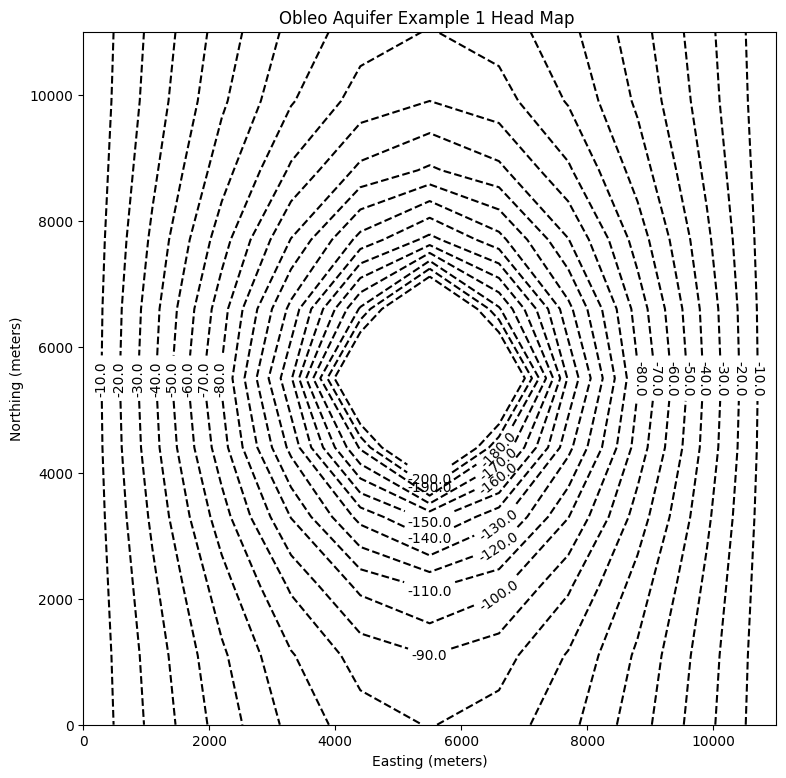

In [88]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(0, 0))
x =  np.linspace(0, delrow*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -200., 100.0
contour_intervals = np.arange(-200., 0., 10.)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Obleo Aquifer Example 1 Head Map ")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

Now for pretty mapping!

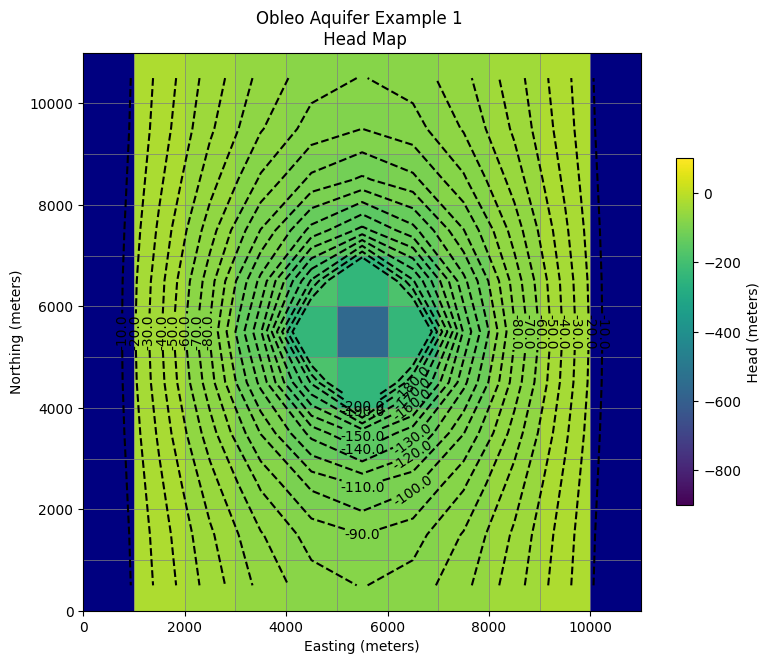

In [89]:
# ### Use the FloPy `PlotMapView()` capabilities for MODFLOW 6

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_title("Obleo Aquifer Example 1 \n Head Map")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
modelmap = flopy.plot.PlotMapView(model=gwf, ax=ax)
pa = modelmap.plot_array(h, vmin=-900, vmax=100)
quadmesh = modelmap.plot_bc("CHD")
linecollection = modelmap.plot_grid(lw=0.5, color="0.5")
contours = modelmap.contour_array(
    h,
    levels=contour_intervals,
    colors="black",
)
ax.clabel(contours, fmt="%2.1f")

cb = plt.colorbar(pa, shrink=0.5, ax=ax)
cb.set_label(' Head (meters) ', rotation=90)

So this seems like a working model next we need to see if the heads are no less than -650 meters (the minimum allowed saturated thickness).  We already have this information contained in the output object.

In [90]:
print("Minimum allowed is -650.0 meters")
print("Pumping at P-1 is:",wel_rec[0][3]/1e6," Mm^3/yr")
print("Minimum Head is:",round(h[0].min(),1)," meters")
if h[0].min() < -650.0:
    print("Computed head is below allowed value - reduce pumpage and rerun simulation")

Minimum allowed is -650.0 meters
Pumping at P-1 is: -2114.0  Mm^3/yr
Minimum Head is: -563.4  meters


---

## Example 2. Single Layer Transient Flow

This example is adapted from the Obleo aquifer case above, with modifications to make into an unsteady model.  The modifications demonstrate the additional inputs needed for unsteady flow modeling.

### Obleo Aquifer Unsteady Example 
This is a transient model of the Obleo aquifer system 

:::{note}
This model is the identical conceptualization as the prior model, except we will use unsteady flow modeling.  We run the simulation to near equilibrium and should get about the same results.
:::

![](obleoaquifer.png)

Sone added information about the system is:

![](obleoparticulars.png)

The general goals for the analysis are:

![](obleogoals.png)

So with a little infomration regarding how we will manage elevations we can move forward with the modeling effort.

![](obleovertdatum.png)

Now onto **modflow**

:::{warning}
Nearly every cell throws a deprecation warning, that filterwarnings('ignore') fails to suppress.  Code seems to still run on my server, but over time as new updates are added to the kernel the code at some point will fail without addressing the warning.  The development computer is `aarch64` an arm processor.  The AWS server is `amd64/intel` architecture, which gets a lot of code development so should stay current longer.  This continuous integration CI and push changes model of modern IT support is phenomenally annoying, but for time being have to get used to it.
:::

In [91]:
%reset -f

In [92]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [93]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import matplotlib.pyplot as plt
import flopy

In [94]:
#dir(flopy.mf6)

In [95]:
# Workspace and Executibles
#binary = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mf6"  # location on MY DEVELOPMENT computer of the compiled modflow program
#workarea = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/example_3" # location on MY DEVELOPMENT computer to store files this example (directory must already exist)

binary = "/home/sensei/mfplayground/modflow-python/mf6.4.1_linux/bin/mf6"  # location on AWS computer of the compiled modflow program
workarea = "/home/sensei/ce-5364-webroot/mfexperiments/example_2" # location on MY computer to store files this example (directory must already exist)

# Set Simulation Name
name = "example02_obleo"
#modelname=name

##### FLOPY Build simulation framework ####
sim = flopy.mf6.MFSimulation(
    sim_name=name, exe_name=binary, version="mf6", sim_ws=workarea
)

In [96]:
# Set Time Structure
Time_Units="YEARS"

# Multiple stress periods
nper = 3 # how many periods
perlen = [1.0, 100.0, 100.0] # how long each one
nstp = [1, 100, 100] # how many steps in each
steady = [True, False, False] # which ones are steady

perioddata = [(1.0,1,1),(30.0,30,1),(30.0,30,1)]

##### FLOPY Build time framework ##########
tdis = flopy.mf6.ModflowTdis(
    sim, pname="tdis", time_units=Time_Units, nper=3, perioddata=perioddata,
)

In [97]:
# Set Iterative Model Solution (choose solver parameters)
# about IMS see: https://water.usgs.gov/nrp/gwsoftware/ModelMuse/Help/sms_sparse_matrix_solution_pac.htm
# using defaults see: https://flopy.readthedocs.io/en/3.3.2/source/flopy.mf6.modflow.mfims.html

##### FLOPY Build IMS framework ###########
ims = flopy.mf6.ModflowIms(sim, pname="ims", complexity="SIMPLE")

In [98]:
# Set Model Name (using same base name as the simulation)
model_nam_file = "{}.nam".format(name)

##### FLOPY Build Model Name framework ####
gwf = flopy.mf6.ModflowGwf(sim, modelname=name, model_nam_file=model_nam_file)

In [99]:

# Define The Grid
Nlay = 1 #number layers
Nrow = 11 #number rows
Ncol = 11 #number columns
# Define distances and elevations
delrow = 1000 # cell size along columns (how tall is a row)
delcol = 1000 # cell size along row (how wide is a column)
topelev = 100.0 # elevation of top of aquifer
thick = 1000.0 #aquifer thickness

bot = [topelev-thick] # bot is a list with Nlay entries
#print(bot)


##### FLOPY Build Model Grid framework #####
dis = flopy.mf6.ModflowGwfdis(gwf,nlay=Nlay,nrow=Nrow,ncol=Ncol,delr=delrow,delc=delcol,top=topelev,botm=bot,
)


In [100]:
# Define initial conditions
h1 = 0.0 # 
start = h1 * np.ones((Nlay, Nrow, Ncol)) # start heads are h1 everywhere

##### FLOPY Build Initial Conditions framework ###
ic = flopy.mf6.ModflowGwfic(gwf, pname="ic", strt=start)

In [101]:
# Define hydraulic conductivity arrays
K = 3650.0
k = K * np.ones((Nlay, Nrow, Ncol)) # Hydraulic conductivity is K everywhere
# Use above to build layer-by-layer spatial varying K
# need to read: to deal with Kx!=Ky

##### FLOPY Build BCF framework ######
npf = flopy.mf6.ModflowGwfnpf(gwf, icelltype=1, k=k, save_flows=True) 
# setting icelltype > 0 is unconfined 
# https://flopy.readthedocs.io/en/3.3.5/source/flopy.mf6.modflow.mfgwfnpf.html?highlight=icelltype#flopy.mf6.modflow.mfgwfnpf.ModflowGwfnpf.icelltype

In [102]:
# Define the storativity arrays
Sy = 0.25 # specific yield
Ss = 2.5e-4 # specific storage

sto = flopy.mf6.ModflowGwfsto(gwf, sy=Sy)

In [103]:
# Define constant head boundary conditions - these need to be supplied for each stress period
chd_rec = []
#h2 = 90 # Just a different value 
#chd_rec.append(((0, 5, 5), h2))
# L,R,T,B constant head boundaries
for layer in range(0, Nlay):
    for row in range(0, Nrow):
        chd_rec.append(((layer, row, 0), h1))  #left column held at h1
        chd_rec.append(((layer, row, Ncol-1), h1)) #right column held at h1
#    for col in range(1,Ncol-1):
#        chd_rec.append(((layer, 0, col), h1)) # top row held at h1
#        chd_rec.append(((layer, Nrow-1 , col), h1)) # bottom row held at h1

stress_period_data = {0: chd_rec, 1: chd_rec, 2: chd_rec} # dictionary same BC each stress period
        
##### FLOPY Build CHD framework #####          
chd = flopy.mf6.ModflowGwfchd(gwf,maxbound=len(chd_rec),stress_period_data=stress_period_data,save_flows=True,
)

In [104]:
# Define wellfields
#wel_rec = []
# wel_rec.append((0, 5, 5, -0e6)) # 0 Mm3/yr - use to examine recharge only
#wel_rec.append((0, 5, 5, -2114e6)) # 2,114 Mm3/yr
# Multiple Stress Periods
pumping_rate = -1000e6
wel_sp1 = [[0, 5, 5, 0.0]]
wel_sp2 = [[0, 5, 5, 1*pumping_rate]]
wel_sp3 = [[0, 5, 5, 2.115*pumping_rate]]
stress_period_data = {0: wel_sp1, 1: wel_sp2, 2: wel_sp3}
#wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)



##### FLOPY Build Wellfields framework #####  
wel = flopy.mf6.ModflowGwfwel(gwf,maxbound=1,stress_period_data=stress_period_data,)

In [105]:
# Define recharge
rech_val = 0.25 #  rate as depth/year
rech_rec = rech_val * np.ones((1, Nrow, Ncol)) # set recharge top layer only

rec_sp1 = rech_rec
rec_sp2 = rech_rec
rec_sp3 = rech_rec

stress_period_data = {0: rec_sp1, 1: rec_sp2, 2: rec_sp3}

#rch = flopy.mf6.ModflowGwfrcha(gwf, maxbound=len(rech_rec),recharge=stress_period_data,)
rch = flopy.mf6.ModflowGwfrcha(gwf, recharge=stress_period_data,)

#rch = flopy.mf6.ModflowGwfrcha(gwf, recharge=rech_val) # default entry format

In [106]:
# something to do with stress periods
iper = 0
ra = chd.stress_period_data.get_data(key=iper)


In [107]:
# Create the output control (`OC`) Package
headfile = "{}.hds".format(name)
head_filerecord = [headfile]
budgetfile = "{}.cbb".format(name)
budget_filerecord = [budgetfile]
saverecord = [("HEAD", "ALL"), ("BUDGET", "ALL")]
printrecord = [("HEAD", "LAST")]

##### FLOPY Build OC framework
oc = flopy.mf6.ModflowGwfoc(
    gwf,
    saverecord=saverecord,
    head_filerecord=head_filerecord,
    budget_filerecord=budget_filerecord,
    printrecord=printrecord,
)

In [108]:
# Write files to the directory
sim.write_simulation();

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims...
  writing model example02_obleo...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package sto...
    writing package chd_0...
    writing package wel_0...
    writing package rcha_0...
    writing package oc...


In [109]:
# Attempt to run MODFLOW this model
success, buff = sim.run_simulation(silent=True, report=True)
if not success:
    raise Exception("MODFLOW 6 did not terminate normally.")

0.9213486227356531


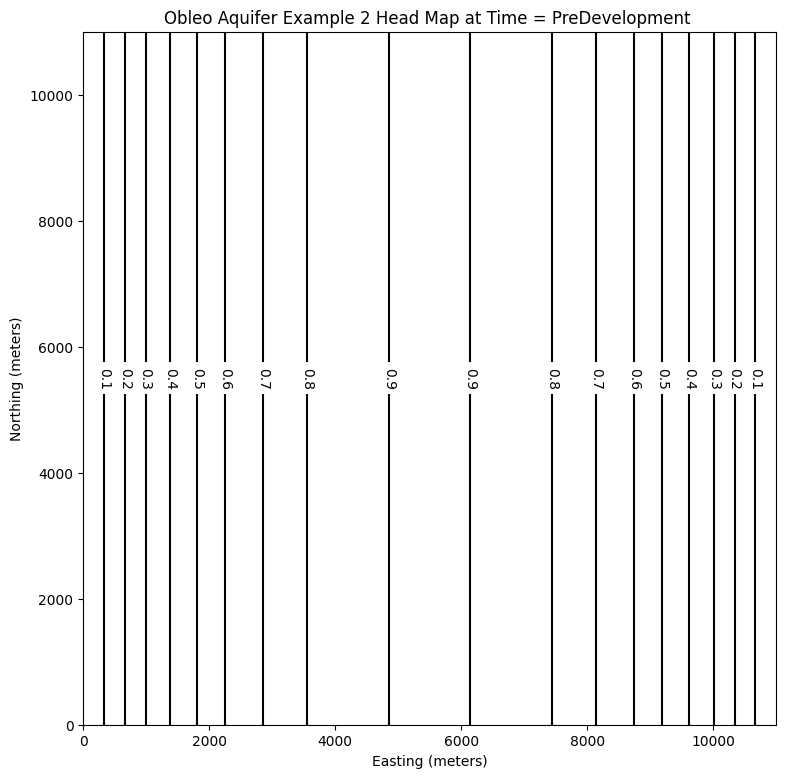

In [110]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(0, 0))
print(h[0].max())
x =  np.linspace(0, delrow*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -200., 100.0
contour_intervals = np.arange(-10., 1.0, 0.1)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Obleo Aquifer Example 2 Head Map at Time = PreDevelopment ")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

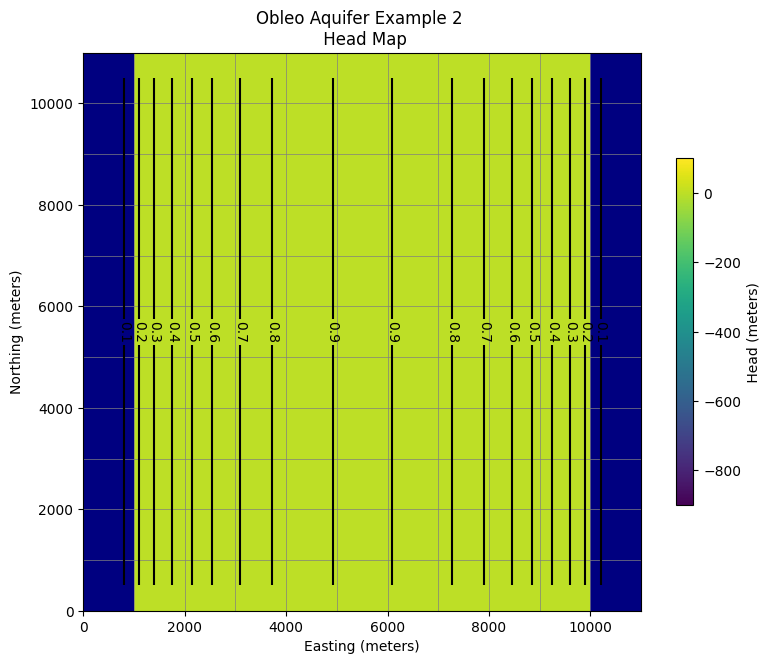

In [111]:
# ### Use the FloPy `PlotMapView()` capabilities for MODFLOW 6

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_title("Obleo Aquifer Example 2 \n Head Map")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
modelmap = flopy.plot.PlotMapView(model=gwf, ax=ax)
pa = modelmap.plot_array(h, vmin=-900, vmax=100)
quadmesh = modelmap.plot_bc("CHD")
linecollection = modelmap.plot_grid(lw=0.5, color="0.5")
contours = modelmap.contour_array(
    h,
    levels=contour_intervals,
    colors="black",
)
ax.clabel(contours, fmt="%2.1f")

cb = plt.colorbar(pa, shrink=0.5, ax=ax)
cb.set_label(' Head (meters) ', rotation=90)

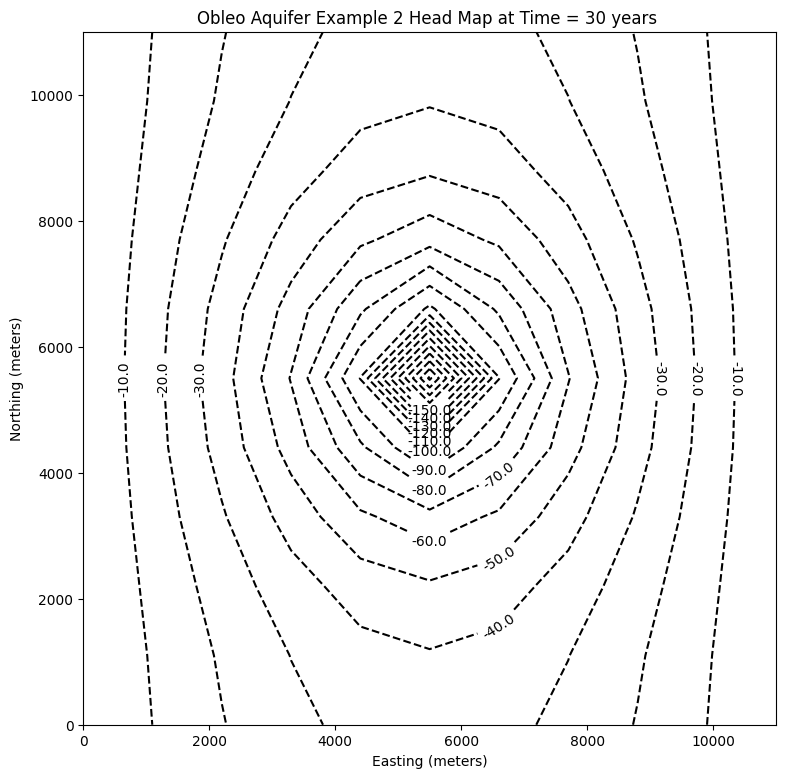

In [112]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(0, 1))
#print(h[0].min())
x =  np.linspace(0, delrow*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -200., 100.0
contour_intervals = np.arange(-200., 1.0, 10)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Obleo Aquifer Example 2 Head Map at Time = 30 years ")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

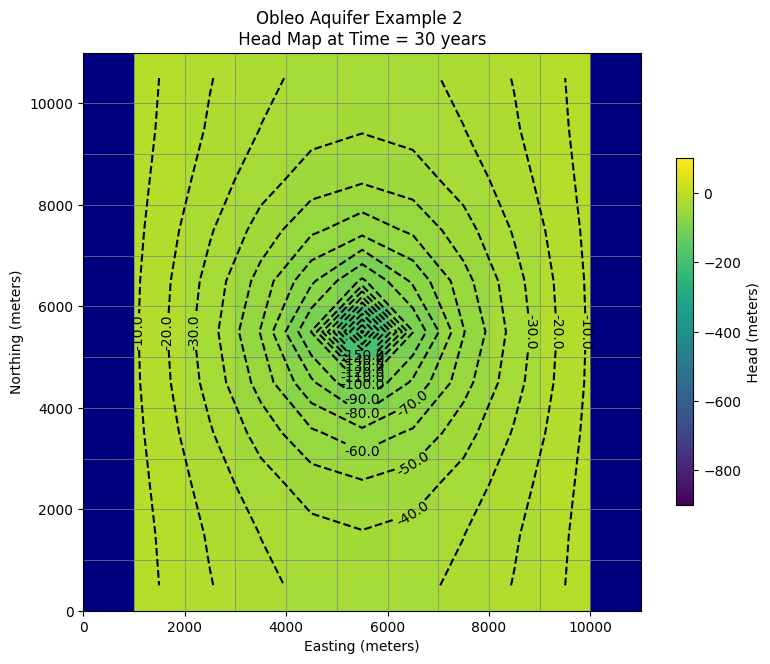

In [113]:
# ### Use the FloPy `PlotMapView()` capabilities for MODFLOW 6

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_title("Obleo Aquifer Example 2 \n Head Map at Time = 30 years ")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
modelmap = flopy.plot.PlotMapView(model=gwf, ax=ax)
pa = modelmap.plot_array(h, vmin=-900, vmax=100)
quadmesh = modelmap.plot_bc("CHD")
linecollection = modelmap.plot_grid(lw=0.5, color="0.5")
contours = modelmap.contour_array(
    h,
    levels=contour_intervals,
    colors="black",
)
ax.clabel(contours, fmt="%2.1f")

cb = plt.colorbar(pa, shrink=0.5, ax=ax)
cb.set_label(' Head (meters) ', rotation=90)

0.0


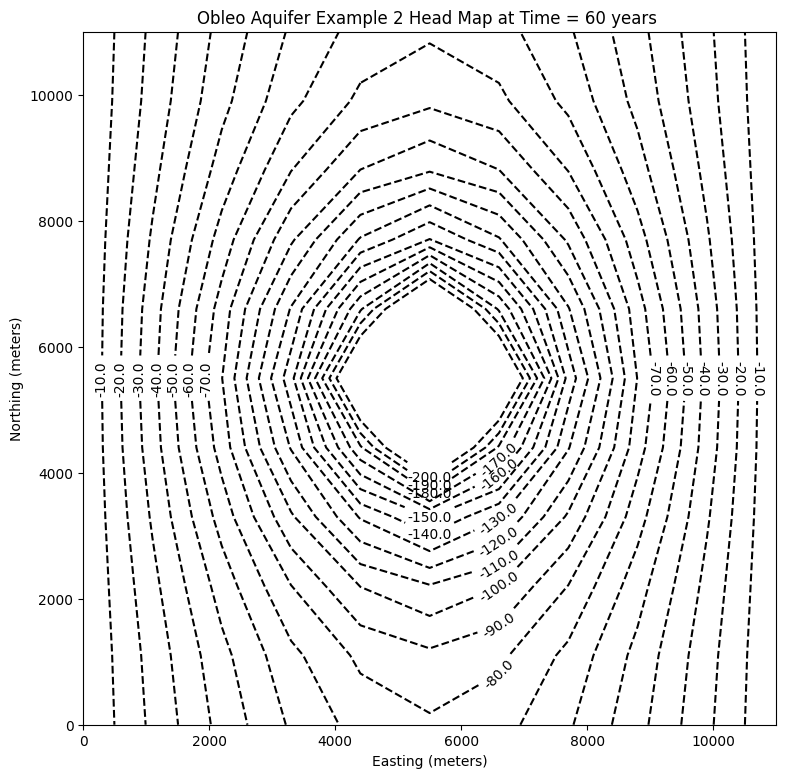

In [114]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(0, 2))
print(h[0].max())
x =  np.linspace(0, delrow*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -200., 100.0
contour_intervals = np.arange(-200., 1.0, 10)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Obleo Aquifer Example 2 Head Map at Time = 60 years ")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

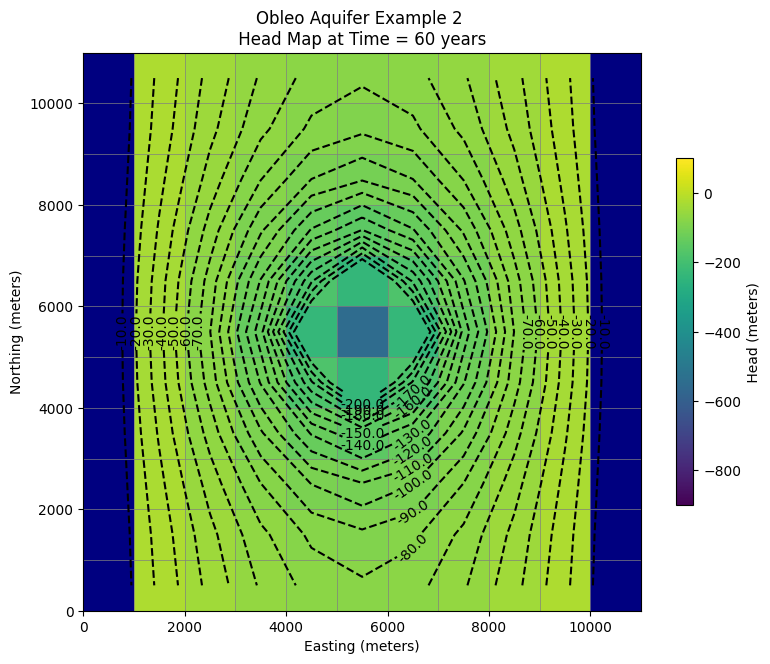

In [115]:
# ### Use the FloPy `PlotMapView()` capabilities for MODFLOW 6

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_title("Obleo Aquifer Example 2 \n Head Map at Time = 60 years ")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
modelmap = flopy.plot.PlotMapView(model=gwf, ax=ax)
pa = modelmap.plot_array(h, vmin=-900, vmax=100)
quadmesh = modelmap.plot_bc("CHD")
linecollection = modelmap.plot_grid(lw=0.5, color="0.5")
contours = modelmap.contour_array(
    h,
    levels=contour_intervals,
    colors="black",
)
ax.clabel(contours, fmt="%2.1f")

cb = plt.colorbar(pa, shrink=0.5, ax=ax)
cb.set_label(' Head (meters) ', rotation=90)

Now for pretty mapping!

So this is the working model, so now we can assess effect of pumping and decide if we can increase the pumping any We already have this information contained in the output object.

In [116]:
print("Minimum allowed is -650.0 meters")
#print("Pumping at P-1 is:",wel_rec[0][3]/1e6," Mm^3/yr")
print("Minimum Head is:",round(h[0].min(),1)," meters")
if h[0].min() < -650.0:
    print("Computed head is below allowed value - reduce pumpage and rerun simulation")

Minimum allowed is -650.0 meters
Minimum Head is: -552.3  meters


---

## Example 3. Multi-Layer Transient Flow

The figure below is a map and cross section of an aquifer system.  

![](drawing_P-12.png)

Two well fields operate in the area; well field A pumping $10 \times 10^{6} \frac{m^3}{yr}$ and a well field B pumping $16 \times 10^{6} \frac{m^3}{yr}$ All the intake screens in well field B are below the semipervious layer.  A new wellfield, C is planned, with an annual withdrawl of $15 \times 10^{6} \frac{m^3}{yr}$ and, if possible, up to $25 \times 10^{6} \frac{m^3}{yr}$.

Use MODFLOW to evaluate the feasibility of the proposed pumping rates for well field C.  The river itself should not serve as a water source because the water rights are already apportioned (i.e. someone else owns the water).

The plan view layout and the 5-layer conceptualization are shown below.  

![](planview.png)

The vertical discritization used is a 5-layer conceptualization to mimic the aquifer system.

![](elevationview.png)

The upper aquifer layer is unconfined and the river is represented using constant head boundaries. The next layer is a confined/unconfined layer and is where the well field A wells are screened (65-125 meters).  The aquitard is a thin layer from (60-65 meters) with spatially varying hydraulic conductivity. The lower aquifers are represented as confined in MODFLOW, with well screens as shown.  

Below we use MODFLOW to produce:

1. An equilibrium head distribution for all 5 aquifer layers in this system, with zero pumping in all wellfields.  This is a pre-development case (recharge only).
2. An equilibrium head distribution for the system with only Wellfield A active (assuming 30 years is long enough to reach equilibrium).
3. An equilibrium head distribution for the system with Wellfields A and B active at the prescribed rates. (Again assuming 30 years is long enough to reach equilibrium).
4. An equilibrium head distribution for the system with Wellfields A and B active at the prescribed rates; Wellfield C is active, but rate is increased by trial-error until gradient from river indicates flow into the aquifer.  

In [117]:
%reset -f

In [118]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [119]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import matplotlib.pyplot as plt
import flopy

In [120]:
#dir(flopy.mf6)


In [121]:
# Workspace and Executibles
#binary = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mf6"  # location on MY computer of the compiled modflow program
#workarea = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/project_1" # location on MY computer to store files this example (directory must already exist)

binary = "/home/sensei/mfplayground/modflow-python/mf6.4.1_linux/bin/mf6"  # location on AWS computer of the compiled modflow program
workarea = "/home/sensei/ce-5364-webroot/mfexperiments/example_3" # location on MY computer to store files this example (directory must already exist)

# Set Simulation Name
name = "example_3"
#modelname=name

##### FLOPY Build simulation framework ####
sim = flopy.mf6.MFSimulation(
    sim_name=name, exe_name=binary, version="mf6", sim_ws=workarea
)

In [122]:
# Set Time Structure
Time_Units="YEARS"

# Multiple stress periods
nper = 4 # how many periods
# perlen = how long each one in problem time units
# nstp =  how many steps in each stress period
# tsmult = time step multiplier
# perioddata = [(perlen,nstp,tsmult),(perlen,nstp,tsmult),(perlen,nstp,tsmult) ... repeat for each stress period]

perioddata = [(30.0,30,1),(30.0,30,1),(30.0,30,1),(30.0,30,1)]

##### FLOPY Build time framework ##########
tdis = flopy.mf6.ModflowTdis(
    sim, pname="tdis", time_units=Time_Units, nper=nper, perioddata=perioddata,
)

In [123]:
# Set Iterative Model Solution (choose solver parameters)
# about IMS see: https://water.usgs.gov/nrp/gwsoftware/ModelMuse/Help/sms_sparse_matrix_solution_pac.htm
# using defaults see: https://flopy.readthedocs.io/en/3.3.2/source/flopy.mf6.modflow.mfims.html

##### FLOPY Build IMS framework ###########
ims = flopy.mf6.ModflowIms(sim, pname="ims", complexity="SIMPLE")

In [124]:
# Set Model Name (using same base name as the simulation)
model_nam_file = "{}.nam".format(name)

##### FLOPY Build Model Name framework ####
gwf = flopy.mf6.ModflowGwf(sim, modelname=name, model_nam_file=model_nam_file)

In [125]:
# Define The Grid
Nlay = 5 #number layers
Nrow = 24 #number rows
Ncol = 11 #number columns
# Define distances and elevations
delrow = 1000 # cell size along columns (how tall is a row)
delcol = 1000 # cell size along row (how wide is a column)
topelev = 180.0 # elevation of top of aquifer
thick = 175.0 #aquifer thickness

#bot = [topelev-thick] # bot is a list with Nlay entries
bot = np.array([125,65,60,25,0])
#print(bot)


##### FLOPY Build Model Grid framework #####
dis = flopy.mf6.ModflowGwfdis(gwf,nlay=Nlay,nrow=Nrow,ncol=Ncol,delr=delrow,delc=delcol,top=topelev,botm=bot,
)


In [126]:
# Define initial conditions
h1 = 151.0 # 
start = h1 * np.ones((Nlay, Nrow, Ncol)) # start heads are h1 everywhere

##### FLOPY Build Initial Conditions framework ###
ic = flopy.mf6.ModflowGwfic(gwf, pname="ic", strt=start)

In [127]:
# Define hydraulic conductivity arrays
K1 = 2*3650.0
K2 = 2*3650.0
K3 = 0.01*3650.0
K4 = 2*3650.0
K5 = 4*3650
k = np.ones((Nlay, Nrow, Ncol)) # populate k with ones
#print(k) # check structure
k[0] = K1*np.ones((1, Nrow, Ncol))
k[1] = K2*np.ones((1, Nrow, Ncol))
k[2] = K3*np.ones((1, Nrow, Ncol)) # modify for spatial varying K this layer
for irow in range(18,Nrow):
    k[2][irow] = K2
k[3] = K4*np.ones((1, Nrow, Ncol))
k[4] = K5*np.ones((1, Nrow, Ncol))
#print(k[2]) # check structure
# Use above to build layer-by-layer spatial varying K
# need to read: to deal with Kx!=Ky

##### FLOPY Build BCF framework ######
npf = flopy.mf6.ModflowGwfnpf(gwf, icelltype=1, k=k, save_flows=True) 
# setting icelltype > 0 is unconfined 
# https://flopy.readthedocs.io/en/3.3.5/source/flopy.mf6.modflow.mfgwfnpf.html?highlight=icelltype#flopy.mf6.modflow.mfgwfnpf.ModflowGwfnpf.icelltype

In [128]:
# Define the storativity arrays
Sy = 0.25 # specific yield
Ss = 2.5e-4 # specific storage

sto = flopy.mf6.ModflowGwfsto(gwf, sy=Sy)

In [129]:
# Define constant head boundary conditions - these need to be supplied for each stress period
chd_rec = []
hriv = 151 # river as a boundary
for col in range(0,Ncol):
    chd_rec.append(((0, 6 , col), hriv)) # river as a boundary
#chd_rec.append(((0, 5, 5), h2))
# L,R,T,B constant head boundaries
#for layer in range(0, Nlay):
#    for row in range(0, Nrow):
#        chd_rec.append(((layer, row, 0), h1))  #left column held at h1
#        chd_rec.append(((layer, row, Ncol-1), h1)) #right column held at h1
#    for col in range(1,Ncol-1):
#        chd_rec.append(((layer, 0, col), h1)) # top row held at h1
#        chd_rec.append(((layer, Nrow-1 , col), h1)) # bottom row held at h1

stress_period_data = {0: chd_rec, 1: chd_rec, 2: chd_rec, 3: chd_rec} # dictionary same BC each stress period
        
##### FLOPY Build CHD framework #####          
chd = flopy.mf6.ModflowGwfchd(gwf,maxbound=len(chd_rec),stress_period_data=stress_period_data,save_flows=True,
)

In [130]:
# Define wellfields
#wel_rec = []
# wel_rec.append((0, 5, 5, -0e6)) # 0 Mm3/yr - use to examine recharge only
#wel_rec.append((0, 5, 5, -2114e6)) # 2,114 Mm3/yr
# Multiple Stress Periods


wel_sp1 = []
wel_sp1.append((0, 21, 5, -0.01)) #wellfieldA-upper
wel_sp1.append((1, 21, 5, -0.01)) #wellfieldA-lower
wel_sp1.append((3, 14, 6, -0.01)) #wellfieldB-upper
wel_sp1.append((4, 14, 6, -0.01)) #wellfieldB-lower
wel_sp1.append((3, 4, 6, -0.01)) #wellfieldC-upper
wel_sp1.append((4, 4, 6, -0.01)) #wellfieldC-lower

wel_sp2 = []
wel_sp2.append((0, 21, 5, -5.0e6)) #wellfieldA-upper
wel_sp2.append((1, 21, 5, -5.0e6)) #wellfieldA-lower
wel_sp2.append((3, 14, 6, -0.1)) #wellfieldB-upper
wel_sp2.append((4, 14, 6, -0.1)) #wellfieldB-lower
wel_sp2.append((3, 4, 6, -0.1)) #wellfieldC-upper
wel_sp2.append((4, 4, 6, -0.1)) #wellfieldC-lower

wel_sp3 = []
wel_sp3.append((0, 21, 5, -5.0e6)) #wellfieldA-upper
wel_sp3.append((1, 21, 5, -5.0e6)) #wellfieldA-lower
wel_sp3.append((3, 14, 6, -8.0e6)) #wellfieldB-upper
wel_sp3.append((4, 14, 6, -8.0e6)) #wellfieldB-lower
wel_sp3.append((3, 4, 6, -0.1)) #wellfieldC-upper
wel_sp3.append((4, 4, 6, -0.1)) #wellfieldC-lower

wel_sp4 = []
wel_sp4.append((0, 21, 5, -5.0e6)) #wellfieldA-upper
wel_sp4.append((1, 21, 5, -5.0e6)) #wellfieldA-lower
wel_sp4.append((3, 14, 6, -8.0e6)) #wellfieldB-upper
wel_sp4.append((4, 14, 6, -8.0e6)) #wellfieldB-lower
wel_sp4.append((3, 4, 6, -3.0e6)) #wellfieldC-upper
wel_sp4.append((4, 4, 6, -5.0e6)) #wellfieldC-lower

stress_period_data = {0: wel_sp1, 1: wel_sp2, 2: wel_sp3, 3: wel_sp4}
#wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)



##### FLOPY Build Wellfields framework #####  
wel = flopy.mf6.ModflowGwfwel(gwf,maxbound=6,stress_period_data=stress_period_data,)

In [131]:
# Define recharge
rech_val = 0.25 #  rate as depth/year
rech_rec = rech_val * np.ones((1, Nrow, Ncol)) # set recharge top layer only

rec_sp1 = rech_rec
rec_sp2 = rech_rec
rec_sp3 = rech_rec

stress_period_data = {0: rec_sp1, 1: rec_sp2, 2: rec_sp3}

#rch = flopy.mf6.ModflowGwfrcha(gwf, maxbound=len(rech_rec),recharge=stress_period_data,)
rch = flopy.mf6.ModflowGwfrcha(gwf, recharge=stress_period_data,)

#rch = flopy.mf6.ModflowGwfrcha(gwf, recharge=rech_val) # default entry format

In [132]:
# something to do with stress periods
iper = 0
ra = chd.stress_period_data.get_data(key=iper)


In [133]:
# Create the output control (`OC`) Package
headfile = "{}.hds".format(name)
head_filerecord = [headfile]
budgetfile = "{}.cbb".format(name)
budget_filerecord = [budgetfile]
saverecord = [("HEAD", "ALL"), ("BUDGET", "ALL")]
printrecord = [("HEAD", "LAST")]

##### FLOPY Build OC framework
oc = flopy.mf6.ModflowGwfoc(
    gwf,
    saverecord=saverecord,
    head_filerecord=head_filerecord,
    budget_filerecord=budget_filerecord,
    printrecord=printrecord,
)

In [134]:
# Write files to the directory
sim.write_simulation();

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims...
  writing model example_3...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package sto...
    writing package chd_0...
    writing package wel_0...
    writing package rcha_0...
    writing package oc...


In [135]:
# Attempt to run MODFLOW this model
success, buff = sim.run_simulation(silent=True, report=True)
if not success:
    raise Exception("MODFLOW 6 did not terminate normally.")

179.42766115495905
179.42524150729793


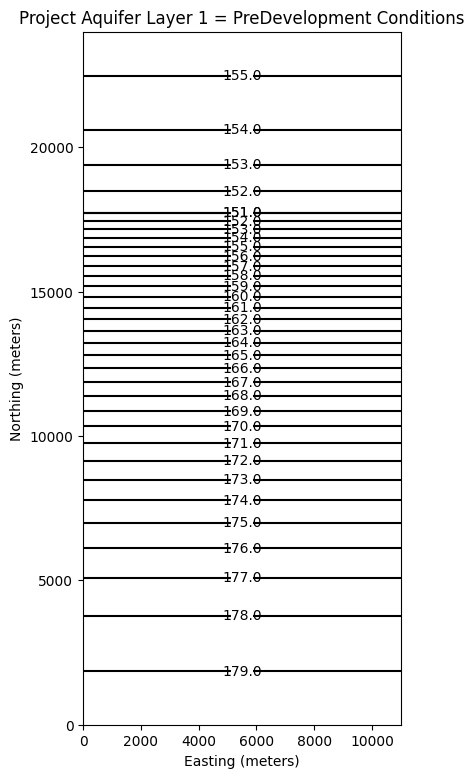

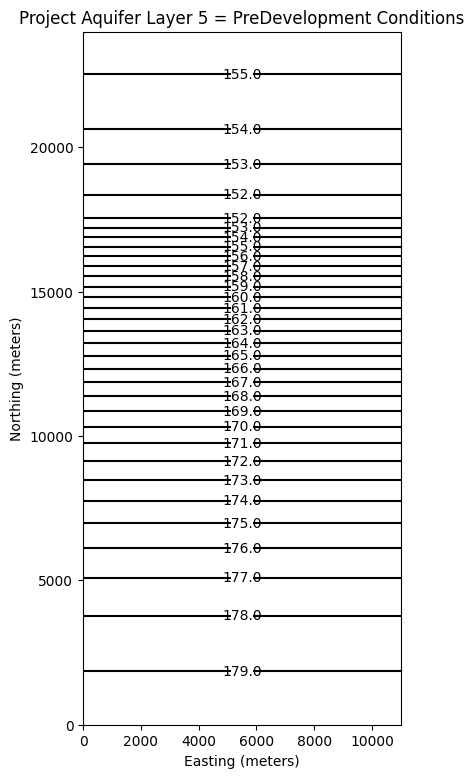

In [136]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(29, 0))
print(h[0].max())
#print(h[0])
#x = np.linspace(0, LC, Ncol )
x =  np.linspace(0, delcol*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -0., 175.0
contour_intervals = np.arange(0, 200.0, 1.0)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 1 = PreDevelopment Conditions")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

# ### Plot a Map of Layer 5

print(h[4].max())

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[4], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 5 = PreDevelopment Conditions")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

170.3240007892975
170.32146880491723


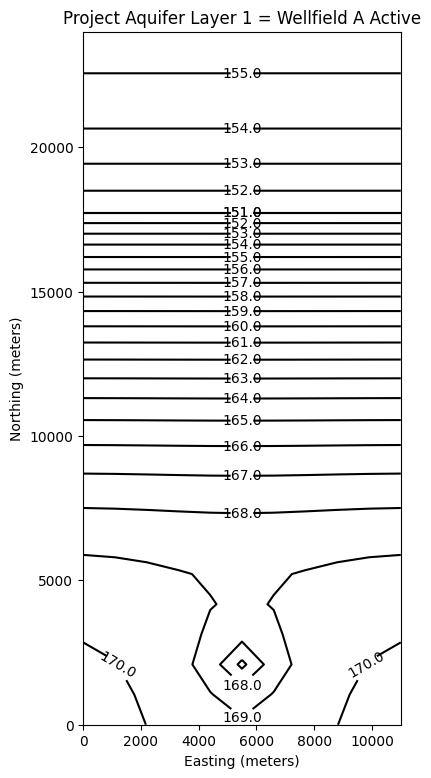

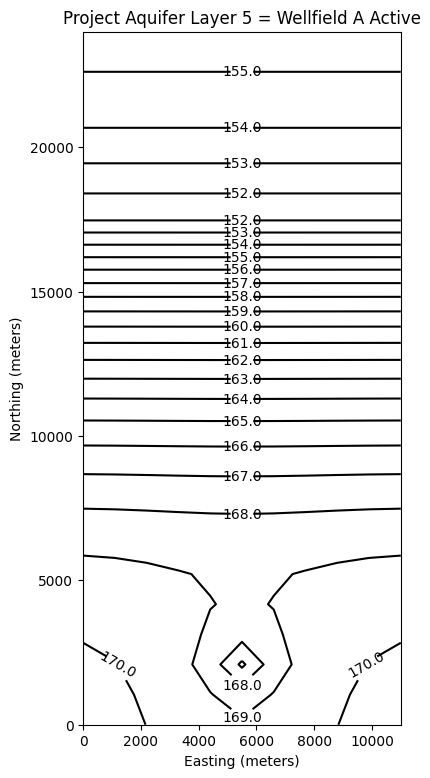

In [137]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(29, 1))
print(h[0].max())
#print(h[0])
#x = np.linspace(0, LC, Ncol )
x =  np.linspace(0, delcol*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -0., 175.0
contour_intervals = np.arange(0, 200.0, 1.0)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 1 = Wellfield A Active")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

# ### Plot a Map of Layer 5

print(h[4].max())

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[4], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 5 = Wellfield A Active")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

161.8575008612184
161.85485401337985


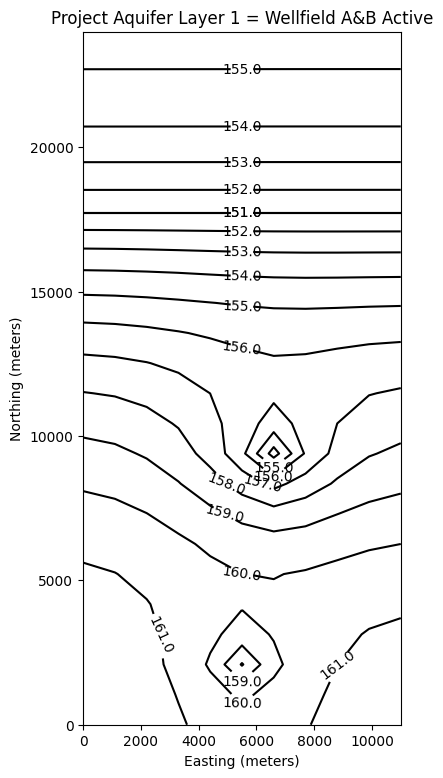

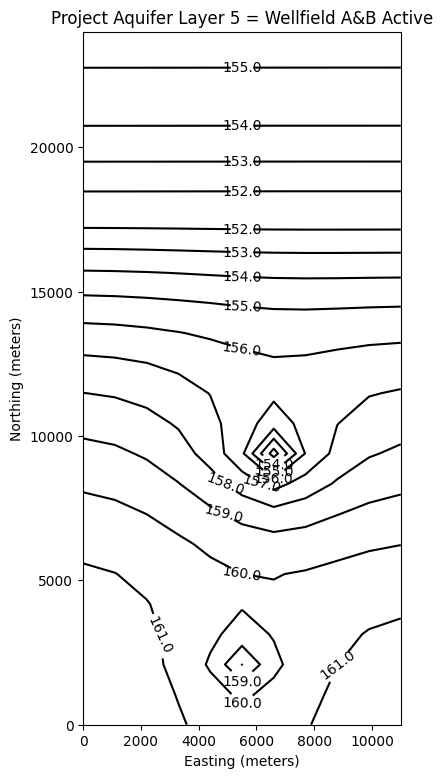

In [138]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(29, 2))
print(h[0].max())
#print(h[0])
#x = np.linspace(0, LC, Ncol )
x =  np.linspace(0, delcol*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -0., 175.0
contour_intervals = np.arange(0, 200.0, 1.0)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 1 = Wellfield A&B Active")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

# ### Plot a Map of Layer 5

print(h[4].max())

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[4], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 5 = Wellfield A&B Active")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

161.83147923607353
161.82883201930647


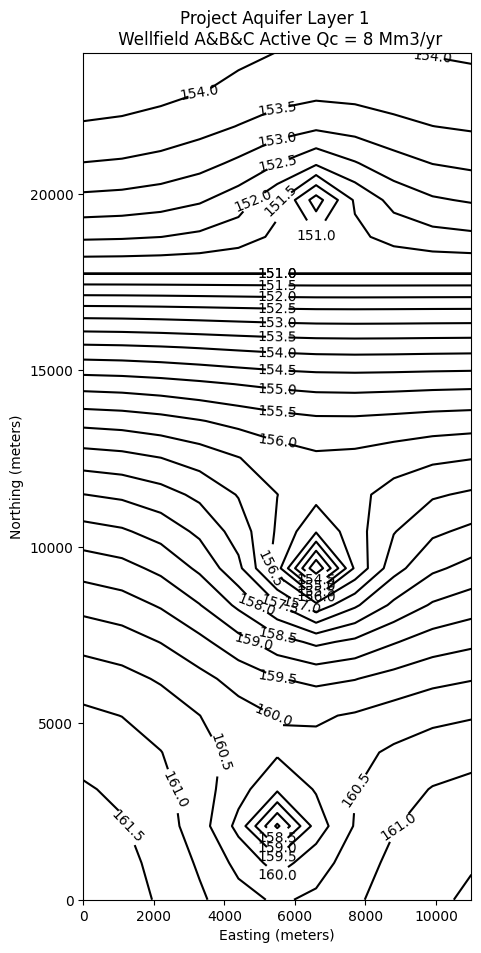

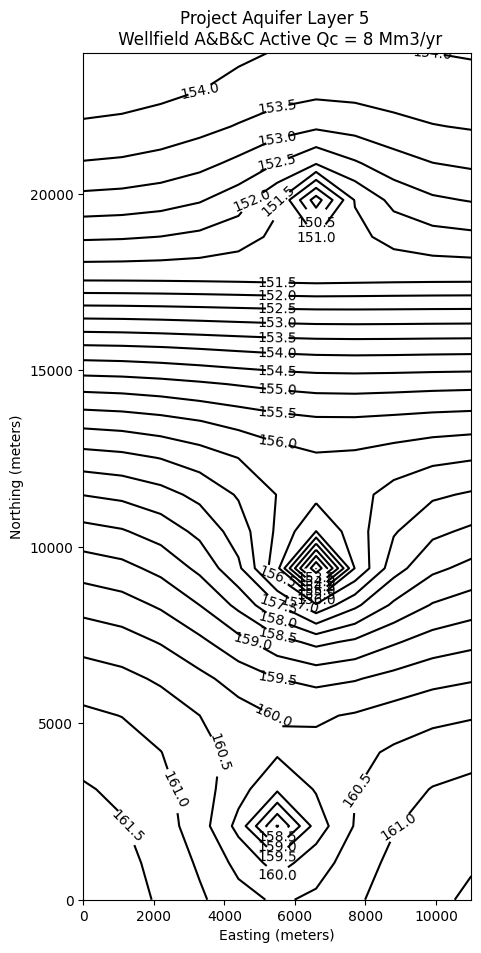

In [139]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(29, 3))
print(h[0].max())
#print(h[0])
#x = np.linspace(0, LC, Ncol )
x =  np.linspace(0, delcol*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -0., 175.0
contour_intervals = np.arange(0, 200.0, 0.50)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 1 \n Wellfield A&B&C Active Qc = 8 Mm3/yr")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

# ### Plot a Map of Layer 5

print(h[4].max())

fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[4], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 5 \n Wellfield A&B&C Active Qc = 8 Mm3/yr")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

So for the stated problem, wellfield C is limited to about $8~\frac{Mm^3}{yr}$ if the goal is to avoid river flow into the aquifer.

The next steps are to add stress periods according to the annual pumping schedule to examine the effect time-of-year has on the heads.

## Exercise(s)

In [140]:
# autobuild

## End of Section